In [78]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.inference import VariableElimination
import numpy as np



Ex 1.a):

+------+-----+
| S(0) | 0.6 |
+------+-----+
| S(1) | 0.4 |
+------+-----+ +------+------+------+
| S    | S(0) | S(1) |
+------+------+------+
| O(0) | 0.9  | 0.3  |
+------+------+------+
| O(1) | 0.1  | 0.7  |
+------+------+------+ +------+------+------+
| S    | S(0) | S(1) |
+------+------+------+
| L(0) | 0.7  | 0.2  |
+------+------+------+
| L(1) | 0.3  | 0.8  |
+------+------+------+ +------+------+------+------+------+
| S    | S(0) | S(0) | S(1) | S(1) |
+------+------+------+------+------+
| L    | L(0) | L(1) | L(0) | L(1) |
+------+------+------+------+------+
| M(0) | 0.8  | 0.4  | 0.5  | 0.1  |
+------+------+------+------+------+
| M(1) | 0.2  | 0.6  | 0.5  | 0.9  |
+------+------+------+------+------+
(O ⟂ M, L | S)
(L ⟂ O | S)
(M ⟂ O | S, L)


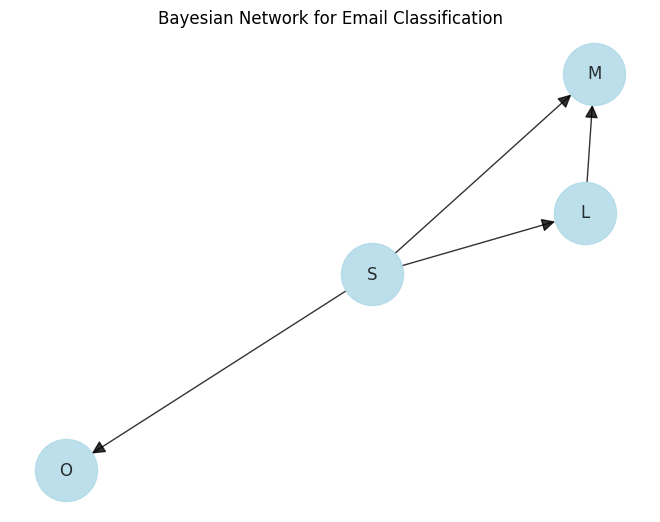

In [29]:
email_model = DiscreteBayesianNetwork([
    ('S', 'O'),
    ('S','L'),
    ('S','M'),
    ('L','M')
])

cpd_S=TabularCPD(variable='S',variable_card=2,values=[[0.6],[0.4]])
cpd_O=TabularCPD(variable='O',variable_card=2,values=[[0.9,0.3],[0.1,0.7]],evidence=['S'],evidence_card=[2])
cpd_L=TabularCPD(variable='L',variable_card=2,values=[[0.7,0.2],[0.3,0.8]],evidence=['S'],evidence_card=[2])
#00,01,10,11
cpd_M=TabularCPD(variable='M',variable_card=2,values=[[0.8,0.4,0.5,0.1],[0.2,0.6,0.5,0.9]],evidence=['S','L'],evidence_card=[2,2])

email_model.add_cpds(cpd_S,cpd_O,cpd_L,cpd_M)
print(cpd_S,cpd_O,cpd_L,cpd_M)
print(email_model.local_independencies(['S','O','L','M']))
G = nx.DiGraph(email_model.edges())
pos = nx.spring_layout(G)
nx.draw(
    G,
    pos=pos,
    with_labels=True,
    node_size=2000,
    node_color='lightblue',
    font_size=12,
    arrowsize=20,
    alpha=0.8
)
plt.title("Bayesian Network for Email Classification")
plt.show()




EX 1.b)

In [38]:
infer=VariableElimination(email_model)
query_result1=infer.query(variables=['S'],evidence={'O':0,'L':0,'M':0})
rows=[]
for i1 in range(2):
    for i2 in range(2):
         for i3 in range(2):
             query_result=infer.query(variables=['S'],evidence={'O':i1,'L':i2,'M':i3})
             decision="Spam" if query_result.values[1]>0.5 else "Not Spam"
             rows.append(f'O: {i1}, L: {i2}, M: {i3}, P(S=1|O,L,M):{round(query_result.values[1],3)},Decision:{decision}')
for row in rows:
  print(row)


O: 0, L: 0, M: 0, P(S=1|O,L,M):0.038,Decision:Not Spam
O: 0, L: 0, M: 1, P(S=1|O,L,M):0.137,Decision:Not Spam
O: 0, L: 1, M: 0, P(S=1|O,L,M):0.129,Decision:Not Spam
O: 0, L: 1, M: 1, P(S=1|O,L,M):0.471,Decision:Not Spam
O: 1, L: 0, M: 0, P(S=1|O,L,M):0.455,Decision:Not Spam
O: 1, L: 0, M: 1, P(S=1|O,L,M):0.769,Decision:Spam
O: 1, L: 1, M: 0, P(S=1|O,L,M):0.757,Decision:Spam
O: 1, L: 1, M: 1, P(S=1|O,L,M):0.949,Decision:Spam


Exercitiul 2:

In [59]:
ex2=DiscreteBayesianNetwork([('Dice','Urn')])
CPD_D=TabularCPD(variable='Dice',variable_card=3,values=[[1/6],[1/3],[1/2]],state_names={'Dice':['dice=6','other','prime']})
CPD_U=TabularCPD(variable='Urn',variable_card=3,values=[[4/10,3/10,3/10],[4/10,5/10,4/10],[2/10,2/10,3/10]],evidence=['Dice'],evidence_card=[3],state_names={'Dice':['dice=6','other','prime'],'Urn':['red','blue','black']})

ex2.add_cpds(CPD_D,CPD_U)
print(CPD_D)
print(CPD_U)

infer=VariableElimination(ex2)
query_result2=infer.query(variables=['Urn'])
print("Probability of drawing a red ball is:",query_result2.values[0])
print("Estimated probability of drawing a red ball is:0.3152 (Lab02)")



+--------------+----------+
| Dice(dice=6) | 0.166667 |
+--------------+----------+
| Dice(other)  | 0.333333 |
+--------------+----------+
| Dice(prime)  | 0.5      |
+--------------+----------+
+------------+--------------+-------------+-------------+
| Dice       | Dice(dice=6) | Dice(other) | Dice(prime) |
+------------+--------------+-------------+-------------+
| Urn(red)   | 0.4          | 0.3         | 0.3         |
+------------+--------------+-------------+-------------+
| Urn(blue)  | 0.4          | 0.5         | 0.4         |
+------------+--------------+-------------+-------------+
| Urn(black) | 0.2          | 0.2         | 0.3         |
+------------+--------------+-------------+-------------+
Probability of drawing a red ball is: 0.31666666666666665
Estimated probability of drawing a red ball is:0.3152 (Lab02)


Exercitiul 3.1

In [77]:
np.random.seed(12)
def game():
    fair_coin=np.random.randint(0,2) #head=0,tail=1
    if fair_coin==0:
      p0=np.random.randint(1,7)
      p1=sum([np.random.choice([1,0],p=[4/7,3/7]) for _ in range(2*p0+1)]) ##head=1,tail=0
      return "P0" if p0>=p1 else "P1"
    else:
     p1=np.random.randint(1,7)
     p0=sum([np.random.choice([1,0],p=[1/2,1/2]) for _ in range(2*p1+1)]) ## head=1,tail=0
     return "P1" if p1>=p0 else "P0"

simulation=10000
prob_p1=0
prob_p0=0
for _ in range(simulation):
    winner=game()
    prob_p1+=1 if winner=="P1" else 0
    prob_p0+=1 if winner=="P0" else 0

prob_p1=prob_p1/simulation
prob_p0=prob_p0/simulation
print("Estimated Probability that p0 will win:",prob_p0)
print("Estimated Probability that p1 will win:",prob_p1)


Estimated Probability that p0 will win: 0.4211
Estimated Probability that p1 will win: 0.5789


Exercitiul 3.2

In [74]:
import math

game_model = DiscreteBayesianNetwork([
    ('Start', 'Coin'),
    ('Dice', 'Coin'),
    ('Dice', 'Winner'),
    ('Coin','Winner')
])
def  binomial(n,k,p):
    if k>n:
        return 0
    return math.comb(n,k)*(p**k)*(1-p)**(n-k)

p0 = 1/2
p1 = 4/7
values = np.zeros((13, 12))

for dice in range(1, 7):
    flips = 2 * dice
    for m in range(13):
        if m <= flips:
            values[m, dice-1] =binomial(flips,m,p0)
    for m in range(13):
        if m <= flips:
            values[m, dice-1+6] = binomial(flips,m,p1)

CPD_StartCoin=TabularCPD(variable='Start',variable_card=2,values=[[1/2],[1/2]],state_names={'Start':['P0','P1']})

CPD_Dice=TabularCPD(variable='Dice',variable_card=6,values=[[1/6],[1/6],[1/6],[1/6],[1/6],[1/6]],state_names={'Dice':[1,2,3,4,5,6]})

CPD_Coin=TabularCPD(variable='Coin',variable_card=13,values=values
,evidence=['Start','Dice'],evidence_card=[2,6],
state_names={'Coin':[0,1,2,3,4,5,6,7,8,9,10,11,12],'Dice':[1,2,3,4,5,6],'Start':['P0','P1']})


values = np.zeros((2, 78))
col = 0
for dice in range(1, 7):
    for coin in range(13):
        values[0, col] = 1 if dice >= coin else 0
        values[1, col] = 1 - values[0, col]
        col += 1

CPD_Winner=TabularCPD(variable='Winner',variable_card=2,values=values,evidence=['Dice','Coin'],evidence_card=[6,13],state_names={'Winner':['P0','P1'],'Dice':[1,2,3,4,5,6],'Coin':[0,1,2,3,4,5,6,7,8,9,10,11,12]})

game_model.add_cpds(CPD_StartCoin,CPD_Dice,CPD_Coin,CPD_Winner)
game_model.check_model()

True

Explicatie:
Start – Cine incepe jocul (P0 sau P1).
Afecteaza cine arunca zarul si cine arunca monedele.

Dice – Numarul obtinut de jucatorul care incepe.
Nu depinde de Start, pentru ca zarul nu este masluit.
P(Dice=x) = 1/6 pentru x=1..6

Coin – Numarul de capete obtinut de jucatorul care nu a inceput jocul.
Depinde de Start (pentru a sti ce jucator arunca moneda) si de Dice (numarul de aruncari = 2*Dice).
P0 are moneda corecta (p=1/2), P1 are moneda trucata (p=4/7).

Winner – Cine castiga jocul.
Depinde de Dice si Coin.
Regula: castigator = primul jucator daca Dice ≥ Coin, altfel al doilea jucator.

EX3.3:

In [76]:
infer=VariableElimination(game_model)
prob=infer.query(variables=['Start'],evidence={'Coin':1})
print('Probability that P0 have started the game:',prob.values[0])
print('Probability that P1 have started the game:',prob.values[1])
print('Conclusion: P0 most likely started the game')

Probability that P0 have started the game: 0.5471060205067122
Probability that P1 have started the game: 0.4528939794932878


Probabilitatea data in enunt este echivalenta cu P(Start|Coin=1)